In [1]:
#!jt -t monokai -T -N -kl
#!jt -r

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [3]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 12)
#plt.style.use('dark_background')
plt.style.use('ggplot')

In [4]:
url_country = 'https://github.com/datasets/covid-19/raw/master/data/countries-aggregated.csv'
country_df = pd.read_csv(url_country)[['Date', 'Country', 'Deaths']]

In [5]:
W = pd.DataFrame(country_df.groupby('Date').sum())
W['Country'] = ['World' for _ in range(len(W))]
W['Date'] = W.index
country_df = country_df.append(W)

c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [6]:
Deaths = pd.DataFrame()
Deaths['Date'] = country_df.Date.unique()
Deaths['Date'] = pd.to_datetime(Deaths.Date)
#Deaths = Deaths.set_index('Date')

In [7]:
countries = country_df['Country'].unique()
for c in countries:
    cun = country_df[country_df.Country == c].Deaths
    if 'Korea' in c:
        c = 'S.Korea'
    if c == 'United Kingdom':
        c = 'UK'
    Deaths[c] = list(cun)
Deaths = Deaths.set_index('Date')

In [8]:
Important_countries = ['India', 'World', #'World without China',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'UK', 'France',
                      'S.Korea', 'Iran', 
                       'Russia', 'Mexico', 'Canada']#[::-1]
colors = {'India': 'Blue', 'World': 'Blue', 'World without US': 'Green', 'US': 'Black', 'China': 'red', 
          'Spain': 'yellow','Italy': 'grey', 'Iran': 'brown', 'Ireland': 'violet', 'UK': 'Purple', 
          'S.Korea': 'Black', 'France': 'orange', 'Germany': 'Green', 'Australia': 'Teal' 
          'Russia': 'Brown', 'Mexico': 'Orange', 'Canada': 'Teal'}
def plotter(DF, name, log = True):
    plt.figure(figsize = (14, 7))
    if log:
        if log == 'symlog':
            plt.yscale('symlog')
        else:
            plt.yscale('log')
    if len(DF.columns)>len(Important_countries):
        columns = Important_countries
    else:
        columns = DF.columns
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend()
    plt.show()

In [60]:
def plot2(DF, DF2, name1, name2 = 'Deaths', log = True):
    plt.figure(figsize = (14, 7))
    if log:
        plt.xscale('log')
        if log == 'symlog':
            plt.yscale('symlog')
        else:
            plt.yscale('log')
    if len(DF.columns)>len(Important_countries):
        columns = Important_countries
    else:
        columns = DF.columns
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 #alpha = 0.6
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend()
    plt.show()

In [10]:
Deaths.tail(14)[Important_countries]

,India,World,US,Germany,Italy,Spain,...,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,
2020-04-18,521,163234,39753,4459,23227,20043,...,19345,232,5031,313,650,1401
2020-04-19,559,167797,40945,4586,23660,20453,...,19744,234,5118,361,686,1565
2020-04-20,592,173123,42659,4862,24114,20852,...,20292,236,5209,405,712,1727
2020-04-21,645,180268,45086,5033,24648,21282,...,20829,237,5297,456,857,1910
2020-04-22,681,186945,47412,5279,25085,21717,...,21373,238,5391,513,970,2078
2020-04-23,721,193698,49724,5575,25549,22157,...,21889,240,5481,555,1069,2241
2020-04-24,780,200030,51493,5760,25969,22524,...,22279,240,5574,615,1221,2402
2020-04-25,825,206218,53755,5877,26384,22902,...,22648,242,5650,681,1305,2571
2020-04-26,881,209931,54881,5976,26644,23190,...,22890,243,5710,747,1351,2687


c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


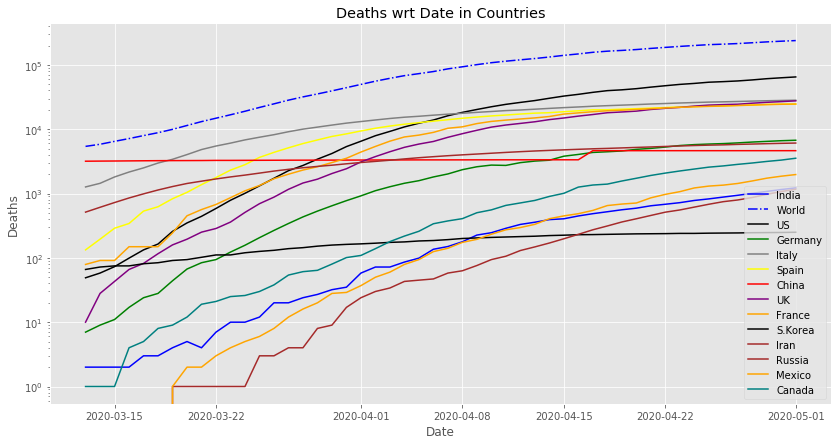

In [11]:
plotter(Deaths[Important_countries].tail(50), 'Deaths')

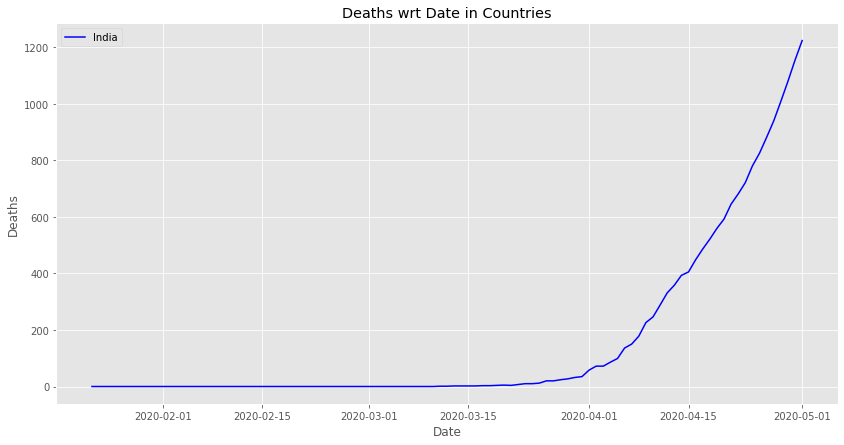

In [12]:
plotter(Deaths[['India']], 'Deaths', False)
#Deaths[['India']].tail(50)

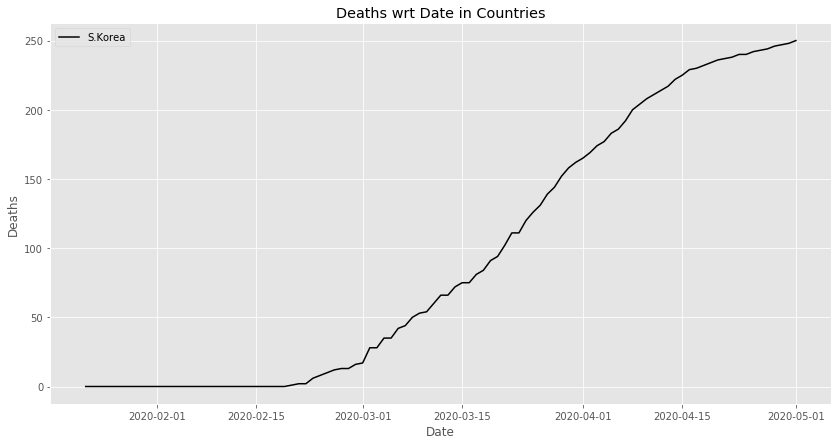

In [14]:
plotter(Deaths[['S.Korea']], 'Deaths', False)

In [15]:
Removed = np.round(Deaths/0.02).astype('int')
Removed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,...,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,
2020-04-18,26050,8161700,1987650,222950,1161350,1002150,...,967250,11600,251550,15650,32500,70050
2020-04-19,27950,8389850,2047250,229300,1183000,1022650,...,987200,11700,255900,18050,34300,78250
2020-04-20,29600,8656150,2132950,243100,1205700,1042600,...,1014600,11800,260450,20250,35600,86350
2020-04-21,32250,9013400,2254300,251650,1232400,1064100,...,1041450,11850,264850,22800,42850,95500
2020-04-22,34050,9347250,2370600,263950,1254250,1085850,...,1068650,11900,269550,25650,48500,103900
2020-04-23,36050,9684900,2486200,278750,1277450,1107850,...,1094450,12000,274050,27750,53450,112050
2020-04-24,39000,10001500,2574650,288000,1298450,1126200,...,1113950,12000,278700,30750,61050,120100
2020-04-25,41250,10310900,2687750,293850,1319200,1145100,...,1132400,12100,282500,34050,65250,128550
2020-04-26,44050,10496550,2744050,298800,1332200,1159500,...,1144500,12150,285500,37350,67550,134350


In [16]:
Biweekly_Deaths = Deaths - Deaths.shift(14)
Biweekly_Deaths = Biweekly_Deaths.fillna(0).astype('int')
Biweekly_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,...,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,
2020-04-18,435,95253,28898,3015,7865,8096,...,11771,55,1579,270,571,1183
2020-04-19,460,94721,28570,3002,7773,7812,...,11651,51,1515,316,592,1306
2020-04-20,456,94356,28765,3052,7591,7511,...,11366,50,1470,358,587,1388
2020-04-21,495,93606,28895,3017,7521,7237,...,10486,45,1425,398,716,1535
2020-04-22,503,93591,29142,2930,7416,6925,...,10486,38,1398,450,796,1671
2020-04-23,495,92816,29469,2968,7270,6710,...,9661,36,1371,479,875,1738
2020-04-24,534,91917,29160,2993,7120,6443,...,9064,32,1342,521,988,1845
2020-04-25,537,92072,29413,3141,6916,6296,...,8797,31,1293,575,1032,1917
2020-04-26,550,90078,28795,2954,6745,5981,...,8478,29,1236,617,1055,1973


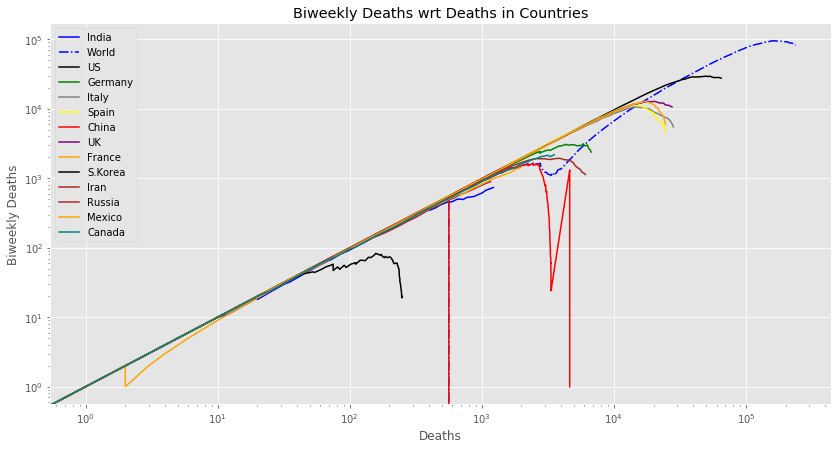

In [17]:
plot2(Deaths, Biweekly_Deaths, 'Biweekly Deaths')

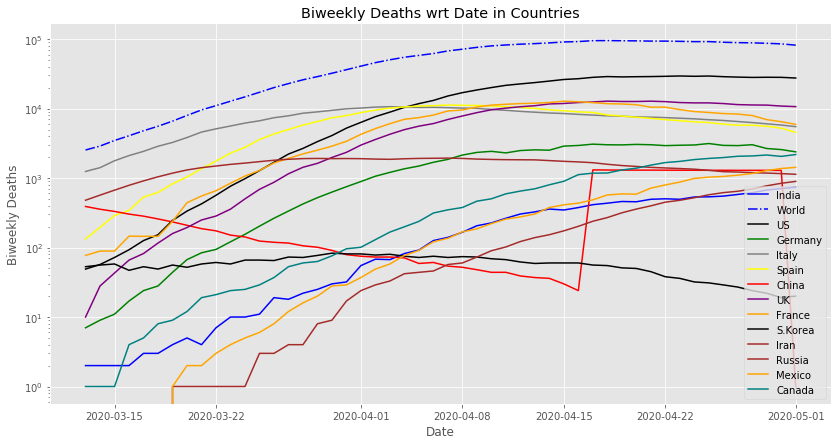

In [18]:
plotter(Biweekly_Deaths[Important_countries].tail(50), 'Biweekly Deaths', True)

In [19]:
# Biweekly increase in biweekly deaths
Increase_Biweekly = Biweekly_Deaths-Biweekly_Deaths.shift(14)
Increase_Biweekly = Increase_Biweekly.fillna(0).astype('int')
Increase_Biweekly[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,...,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,
2020-04-18,353,40397,18485,1655,-2672,-2476,...,4760,-20,-317,228,494,984
2020-04-19,368,36470,16781,1512,-2638,-3057,...,4234,-21,-403,272,501,1068
2020-04-20,330,32348,15657,1365,-2855,-3519,...,3302,-25,-457,312,466,1074
2020-04-21,355,25958,13712,1158,-2786,-4000,...,1245,-27,-513,341,580,1186
2020-04-22,337,22022,12188,787,-2750,-4220,...,932,-36,-518,390,628,1294
2020-04-23,289,16722,10940,628,-2794,-4372,...,-869,-37,-505,406,689,1273
2020-04-24,308,12092,9092,568,-2595,-4500,...,-2154,-37,-512,431,767,1342
2020-04-25,273,9723,7802,838,-2529,-4328,...,-2737,-36,-547,473,775,1324
2020-04-26,246,5548,6129,465,-2375,-4425,...,-3323,-33,-598,495,779,1323


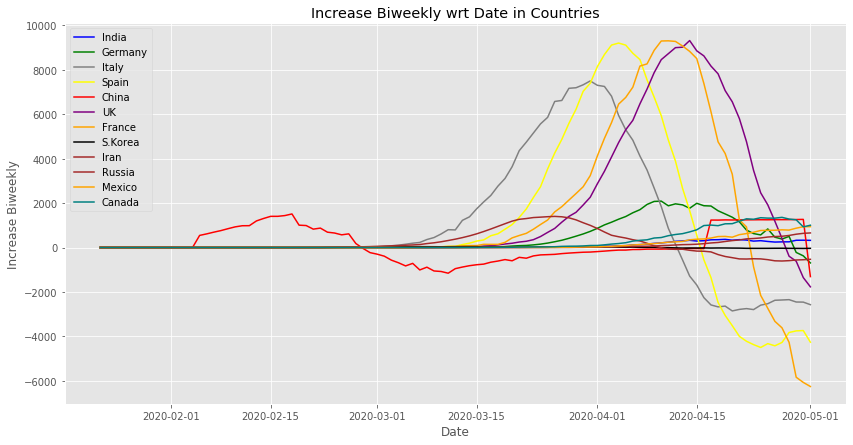

In [20]:
plotter(Increase_Biweekly[[c for c in Important_countries if c not in ['World', 'US']]], 'Increase Biweekly', False)

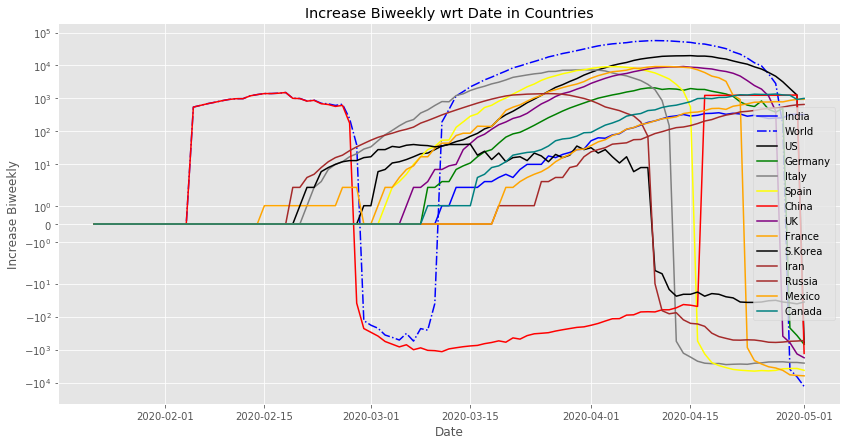

In [21]:
plotter(Increase_Biweekly, 'Increase Biweekly', log = 'symlog')

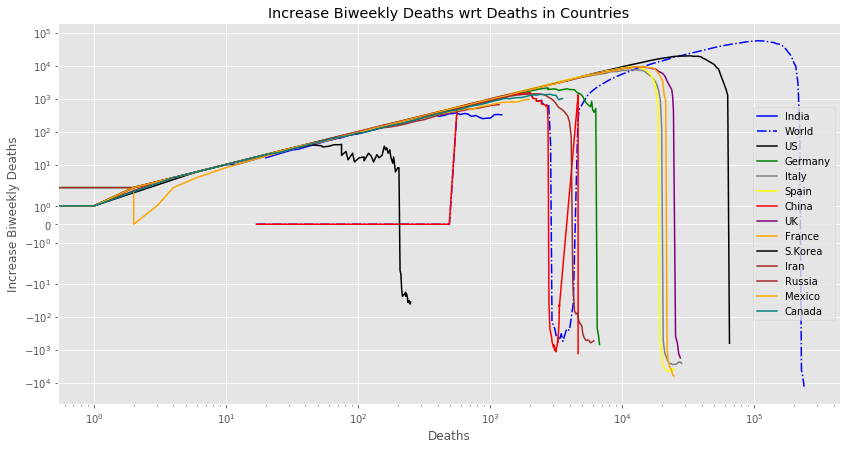

In [22]:
plot2(Deaths, Increase_Biweekly, 'Increase Biweekly Deaths', log = 'symlog')

In [70]:
Slope = np.round(Increase_Biweekly/Biweekly_Deaths, 4)
Slope[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,...,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN


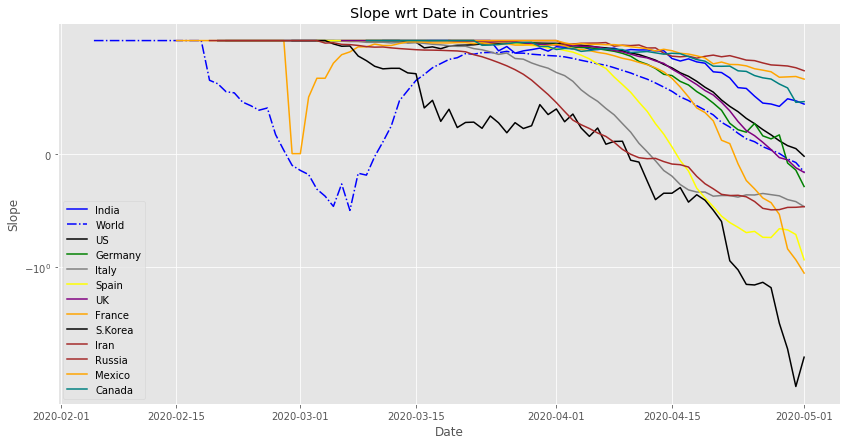

In [24]:
plotter(Slope[[c for c in Important_countries if c!='China']], 'Slope', log = 'symlog')

In [25]:
# Biweekly increase in increase of Biweekly Deaths
Growth_Increase_Biweekly = Increase_Biweekly-Increase_Biweekly.shift(14)
Growth_Increase_Biweekly = Growth_Increase_Biweekly.fillna(0).astype('int')
Growth_Increase_Biweekly[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,...,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,
2020-04-18,275,-4892,8497,379,-8617,-11683,...,-1699,-37,-802,187,419,804
2020-04-19,283,-10757,5557,116,-7939,-12171,...,-2526,-32,-830,229,413,851
2020-04-20,214,-16888,3313,-201,-7687,-12266,...,-3919,-42,-809,267,349,784
2020-04-21,225,-26939,-491,-546,-6904,-12464,...,-6927,-33,-808,285,449,862
2020-04-22,182,-32376,-3486,-1153,-6240,-11772,...,-7337,-44,-711,333,466,946
2020-04-23,102,-39306,-5904,-1448,-5470,-11144,...,-9749,-45,-576,336,511,845
2020-04-24,100,-44853,-8760,-1522,-4442,-10438,...,-11454,-33,-502,345,558,892
2020-04-25,31,-46659,-11136,-1041,-3392,-9165,...,-12045,-31,-481,375,534,791
2020-04-26,-33,-50131,-13190,-1502,-2525,-8317,...,-12604,-18,-516,381,523,736


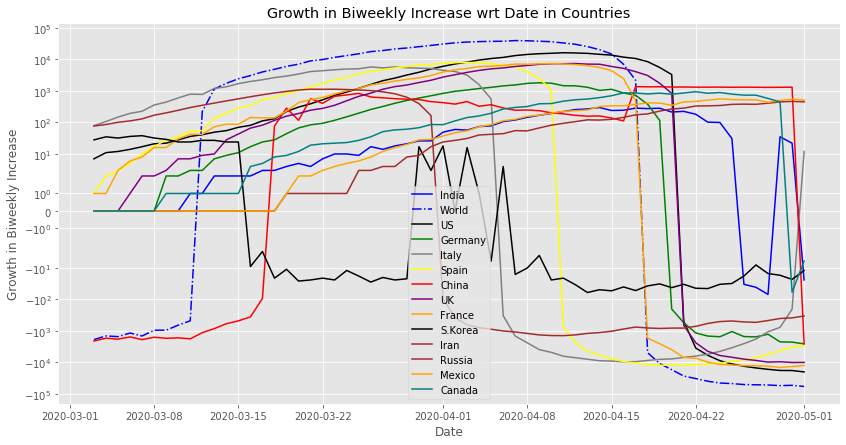

In [26]:
plotter(Growth_Increase_Biweekly.tail(60), 'Growth in Biweekly Increase', log = 'symlog')

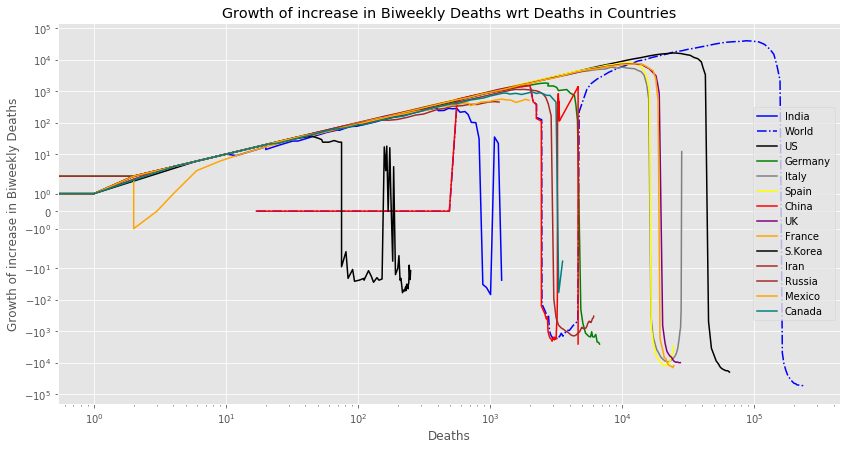

In [27]:
plot2(Deaths, Growth_Increase_Biweekly, 'Growth of increase in Biweekly Deaths', log = 'symlog')

In [28]:
Slope_growth = np.round(Growth_Increase_Biweekly/Biweekly_Deaths, 4)
Slope_growth[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,...,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,
2020-04-18,0.6322,-0.0514,0.2940,0.1257,-1.0956,-1.4431,...,-0.1443,-0.6727,-0.5079,0.6926,0.7338,0.6796
2020-04-19,0.6152,-0.1136,0.1945,0.0386,-1.0214,-1.5580,...,-0.2168,-0.6275,-0.5479,0.7247,0.6976,0.6516
2020-04-20,0.4693,-0.1790,0.1152,-0.0659,-1.0126,-1.6331,...,-0.3448,-0.8400,-0.5503,0.7458,0.5945,0.5648
2020-04-21,0.4545,-0.2878,-0.0170,-0.1810,-0.9180,-1.7223,...,-0.6606,-0.7333,-0.5670,0.7161,0.6271,0.5616
2020-04-22,0.3618,-0.3459,-0.1196,-0.3935,-0.8414,-1.6999,...,-0.6997,-1.1579,-0.5086,0.7400,0.5854,0.5661
2020-04-23,0.2061,-0.4235,-0.2003,-0.4879,-0.7524,-1.6608,...,-1.0091,-1.2500,-0.4201,0.7015,0.5840,0.4862
2020-04-24,0.1873,-0.4880,-0.3004,-0.5085,-0.6239,-1.6201,...,-1.2637,-1.0312,-0.3741,0.6622,0.5648,0.4835
2020-04-25,0.0577,-0.5068,-0.3786,-0.3314,-0.4905,-1.4557,...,-1.3692,-1.0000,-0.3720,0.6522,0.5174,0.4126
2020-04-26,-0.0600,-0.5565,-0.4581,-0.5085,-0.3744,-1.3906,...,-1.4867,-0.6207,-0.4175,0.6175,0.4957,0.3730


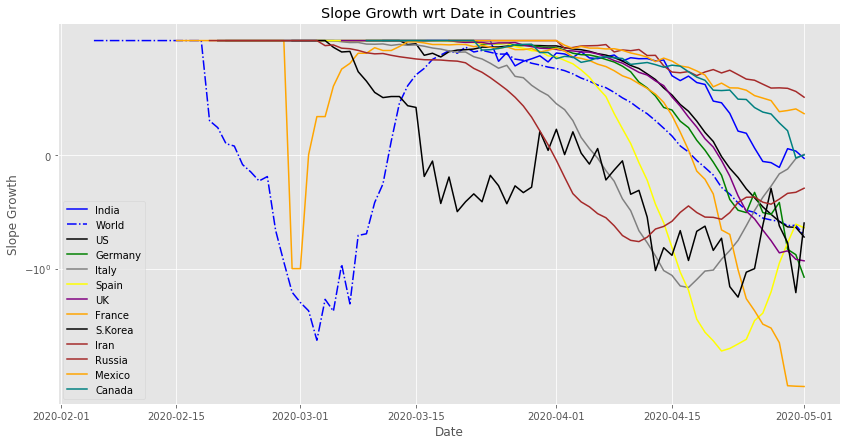

In [29]:
plotter(Slope_growth[[c for c in Important_countries if c!='China']], 'Slope Growth', log = 'symlog')

In [30]:
Biweekly_Growth = np.round(Deaths/Deaths.shift(14), 4)
Biweekly_Growth[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,...,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,
2020-04-18,6.0581,2.4012,3.6622,3.0880,1.5120,1.6777,...,2.5541,1.3107,1.4574,7.2791,8.2278,6.4266
2020-04-19,5.6465,2.2962,3.3087,2.8952,1.4893,1.6180,...,2.4396,1.2787,1.4205,8.0222,7.2979,6.0425
2020-04-20,4.3529,2.1979,3.0703,2.6862,1.4594,1.5630,...,2.2734,1.2688,1.3932,8.6170,5.6960,5.0944
2020-04-21,4.3000,2.0801,2.7846,2.4965,1.4391,1.5153,...,2.0138,1.2344,1.3680,7.8621,6.0780,5.0933
2020-04-22,3.8258,2.0025,2.5951,2.2473,1.4197,1.4682,...,1.9632,1.1900,1.3501,8.1429,5.5747,5.1057
2020-04-23,3.1903,1.9200,2.4549,2.1385,1.3977,1.4344,...,1.7901,1.1765,1.3336,7.3026,5.5103,4.4553
2020-04-24,3.1707,1.8502,2.3057,2.0817,1.3777,1.4007,...,1.6859,1.1538,1.3171,6.5426,5.2403,4.3124
2020-04-25,2.8646,1.8066,2.2083,2.1480,1.3552,1.3791,...,1.6351,1.1469,1.2968,6.4245,4.7802,3.9312
2020-04-26,2.6616,1.7516,2.1038,1.9775,1.3390,1.3476,...,1.5883,1.1355,1.2763,5.7462,4.5642,3.7633


In [31]:
Reproductivity = np.round(Biweekly_Deaths/Biweekly_Deaths.shift(14), 4)
Reproductivity[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,...,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,
2020-04-18,5.3049,1.7364,2.7752,2.2169,0.7464,0.7658,...,1.6789,0.7333,0.8328,6.4286,7.4156,5.9447
2020-04-19,5.0000,1.6261,2.4234,2.0148,0.7466,0.7187,...,1.5709,0.7083,0.7899,7.1818,6.5055,5.4874
2020-04-20,3.6190,1.5217,2.1945,1.8091,0.7267,0.6810,...,1.4095,0.6667,0.7628,7.7826,4.8512,4.4204
2020-04-21,3.5357,1.3837,1.9031,1.6229,0.7297,0.6440,...,1.1347,0.6250,0.7353,6.9825,5.2647,4.3983
2020-04-22,3.0301,1.3077,1.7189,1.3672,0.7295,0.6214,...,1.0976,0.5135,0.7296,7.5000,4.7381,4.4324
2020-04-23,2.4029,1.2198,1.5904,1.2684,0.7224,0.6055,...,0.9175,0.4932,0.7308,6.5616,4.7043,3.7376
2020-04-24,2.3628,1.1515,1.4531,1.2342,0.7329,0.5888,...,0.8080,0.4638,0.7238,5.7889,4.4706,3.6680
2020-04-25,2.0341,1.1181,1.3610,1.3639,0.7322,0.5926,...,0.7627,0.4627,0.7027,5.6373,4.0156,3.2327
2020-04-26,1.8092,1.0656,1.2704,1.1868,0.7396,0.5748,...,0.7184,0.4677,0.6739,5.0574,3.8225,3.0354


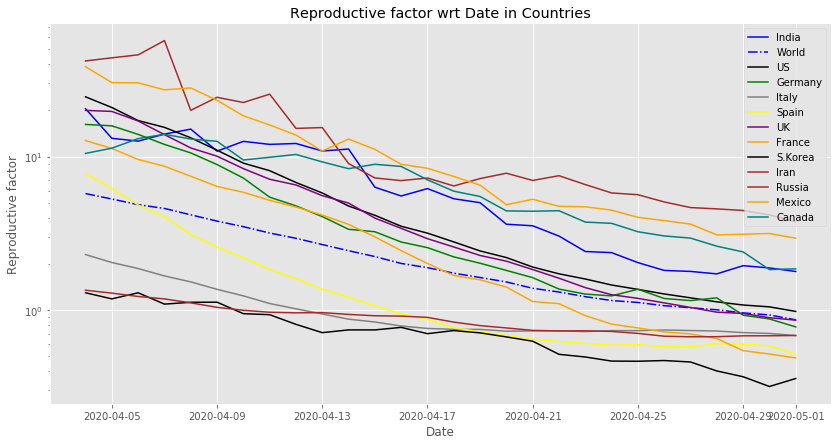

In [51]:
plotter(Reproductivity[[c for c in Important_countries if c != 'China']].tail(28), 'Reproductive factor', True)

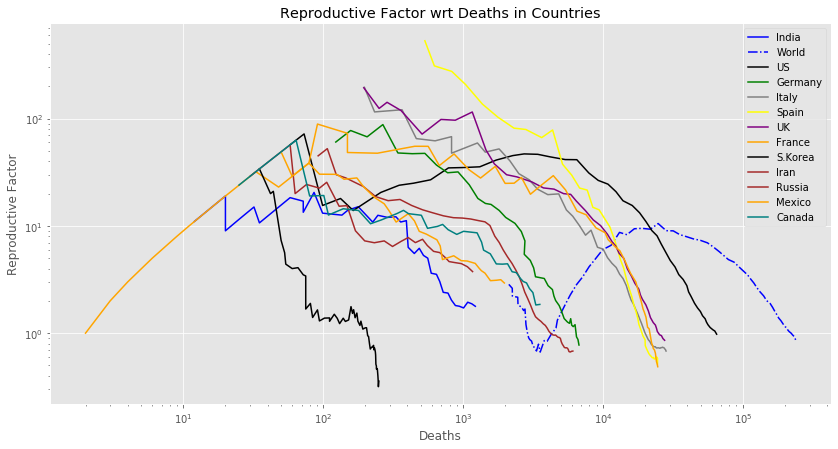

In [63]:
plot2(Deaths[[c for c in Important_countries if c != 'China']], 
      Reproductivity[[c for c in Important_countries if c != 'China']], 
      'Reproductive Factor', log = True)

In [33]:
Daily_Deaths = Deaths-Deaths.shift(1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,...,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,
2020-04-18,35,6410,2342,107,482,41,...,642,2,73,40,104,45
2020-04-19,38,4563,1192,127,433,410,...,399,2,87,48,36,164
2020-04-20,33,5326,1714,276,454,399,...,548,2,91,44,26,162
2020-04-21,53,7145,2427,171,534,430,...,537,1,88,51,145,183
2020-04-22,36,6677,2326,246,437,435,...,544,1,94,57,113,168
2020-04-23,40,6753,2312,296,464,440,...,516,2,90,42,99,163
2020-04-24,59,6332,1769,185,420,367,...,390,0,93,60,152,161
2020-04-25,45,6188,2262,117,415,378,...,369,2,76,66,84,169
2020-04-26,56,3713,1126,99,260,288,...,242,1,60,66,46,116


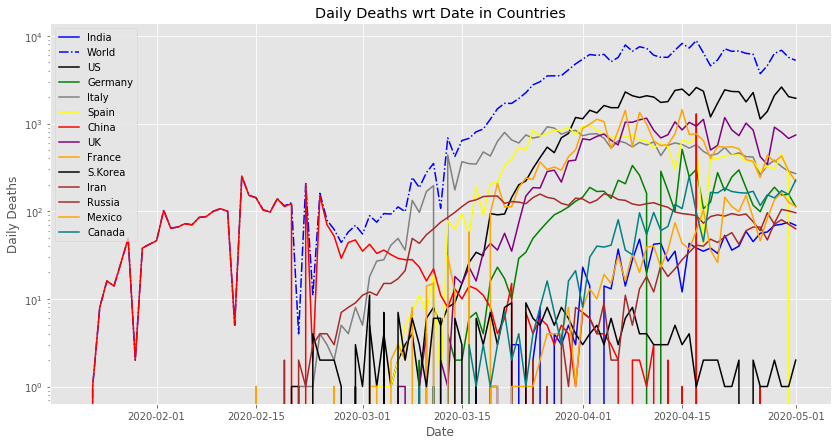

In [34]:
plotter(Daily_Deaths, 'Daily Deaths')

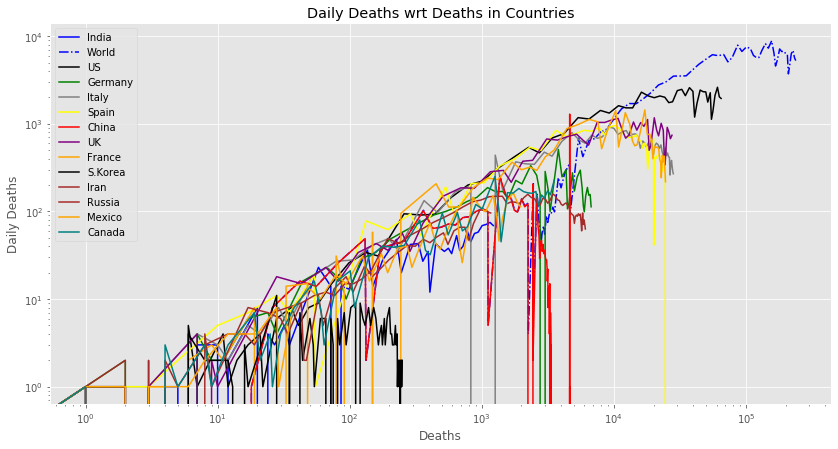

In [35]:
plot2(Deaths, Daily_Deaths, 'Daily Deaths')

In [69]:
#Confirmed = np.round(Removed + Removed*Reproductivity)
Confirmed = np.round(Removed * Biweekly_Growth)
Confirmed[Important_countries].tail(14)

,India,World,US,Germany,Italy,Spain,...,France,S.Korea,Iran,Russia,Mexico,Canada
Date,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

In [54]:
D = {
    'Deaths':Deaths,
    'Biweekly Deaths':Biweekly_Deaths,
    'Increase Biweekly':Increase_Biweekly,
    'GBI':Growth_Increase_Biweekly,
    'Slope Increase':Slope,
    'Slope Growth':Slope_growth ,
    'Removed':Removed,
    'Biweekly Growth':Biweekly_Growth,
    'Reproductive Factor':Reproductivity,
    'Daily Deaths':Daily_Deaths,
    'Confirmed':Confirmed
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
All_lastday = LastDay_DF
LastDay_DF = LastDay_DF[LastDay_DF.Deaths>=1100]

In [55]:
LastDay_DF.sort_values('Deaths', ascending = False)#.head(20)

,Deaths,Biweekly Deaths,Increase Biweekly,GBI,Slope Increase,Slope Growth,Removed,Biweekly Growth,Reproductive Factor,Daily Deaths,Confirmed
Country,,,,,,,,,,,
World,238650,81826,-13186,-57808,-0.1611,-0.7065,11932500,1.5218,0.8612,5262,18158878.0
US,64943,27532,-633,-19901,-0.0230,-0.7228,3247150,1.7359,0.9775,1947,5636728.0
Italy,28236,5491,-2573,12,-0.4686,0.0022,1411800,1.2414,0.6809,269,1752609.0
UK,27583,10673,-1770,-9941,-0.1658,-0.9314,1379150,1.6312,0.8578,741,2249669.0
France,24628,5925,-6258,-12372,-1.0562,-2.0881,1231400,1.3168,0.4863,218,1621508.0
Spain,24543,4541,-4263,-2912,-0.9388,-0.6413,1227150,1.2270,0.5158,0,1505713.0
Belgium,7703,2540,-1480,-4394,-0.5827,-1.7299,385150,1.4920,0.6318,109,574644.0
Germany,6736,2384,-693,-2562,-0.2907,-1.0747,336800,1.5478,0.7748,113,521299.0
Brazil,6412,4271,2489,1055,0.5828,0.2470,320600,2.9949,2.3967,406,960165.0


In [56]:
LastDay_DF.sort_values('Reproductive Factor', ascending = False)#.head(20)

,Deaths,Biweekly Deaths,Increase Biweekly,GBI,Slope Increase,Slope Growth,Removed,Biweekly Growth,Reproductive Factor,Daily Deaths,Confirmed
Country,,,,,,,,,,,
Russia,1169,896,657,451,0.7333,0.5033,58450,4.2821,3.7490,96,250289.0
Peru,1124,824,585,404,0.7100,0.4903,56200,3.7467,3.4477,73,210565.0
Mexico,1972,1426,940,512,0.6592,0.3590,98600,3.6117,2.9342,113,356114.0
Brazil,6412,4271,2489,1055,0.5828,0.2470,320600,2.9949,2.3967,406,960165.0
Canada,3537,2181,1004,-6,0.4603,-0.0028,176850,2.6084,1.8530,227,461296.0
Ireland,1265,735,325,32,0.4422,0.0435,63250,2.3868,1.7927,33,150965.0
India,1223,737,323,-24,0.4383,-0.0326,61150,2.5165,1.7802,69,153884.0
Sweden,2653,1253,211,-489,0.1684,-0.3903,132650,1.8950,1.2025,67,251372.0
Turkey,3258,1489,145,-778,0.0974,-0.5225,162900,1.8417,1.1079,84,300013.0
